In [41]:
import vanna
from vanna.remote import VannaDefault

In [42]:
from dotenv import load_dotenv
import os
load_dotenv()
vn = VannaDefault(model='chinook', api_key=vanna.get_api_key(os.getenv('VANNA_API_KEY')))
vn.connect_to_sqlite('https://vanna.ai/Chinook.sqlite')


KeyboardInterrupt: 

SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE [Album]\n(\n    [AlbumId] INTEGER  NOT NULL,\n    [Title] NVARCHAR(160)  NOT NULL,\n    [ArtistId] INTEGER  NOT NULL,\n    CONSTRAINT [PK_Album] PRIMARY KEY  ([AlbumId]),\n    FOREIGN KEY ([ArtistId]) REFERENCES [Artist] ([ArtistId]) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)\n\nCREATE INDEX [IFK_AlbumArtistId] ON [Album] ([ArtistId])\n\nCREATE INDEX [IFK_TrackAlbumId] ON [Track] ([AlbumId])\n\nCREATE TABLE [Track]\n(\n    [TrackId] INTEGER  NOT NULL,\n    [Name] NVARCHAR(200)  NOT NULL,\n    [AlbumId] INTEGER,\n    [MediaTypeId] INTEGER  NOT NULL,\n    [GenreId] INTEGER,\n    [Composer] NVARCHAR(220),\n    [Milliseconds] INTEGER  NOT NULL,\n    [Bytes] INTEGER,\n    [UnitPrice] NUMERIC(10,2)  NOT NULL,\n    CONS

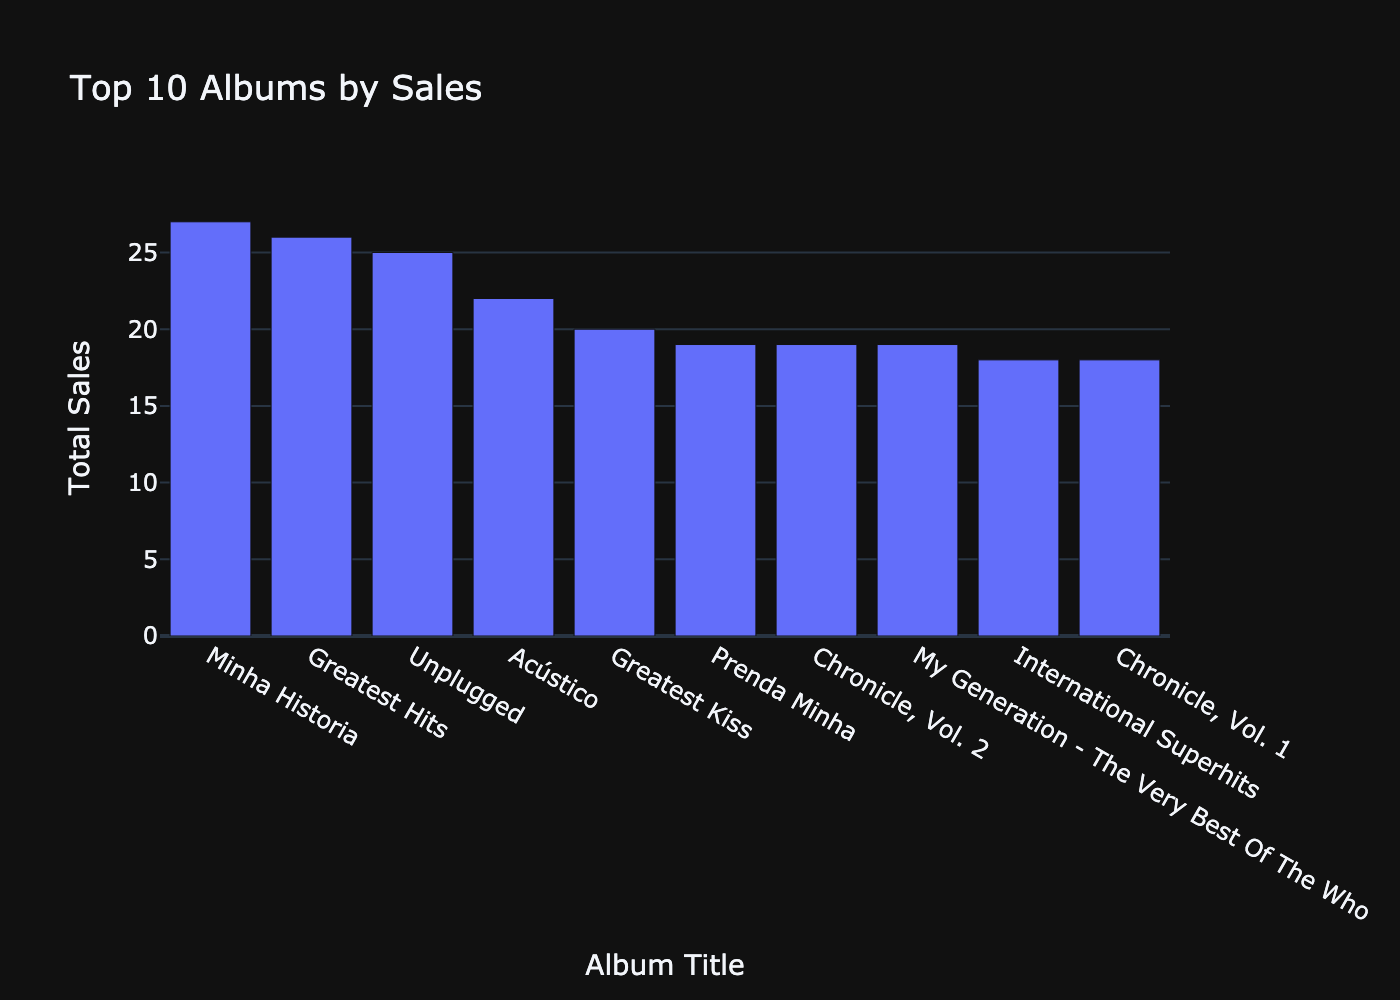

('SELECT a.AlbumId, a.Title, SUM(il.Quantity) AS TotalSales\nFROM Album a\nINNER JOIN Track t ON a.AlbumId = t.AlbumId\nINNER JOIN InvoiceLine il ON t.TrackId = il.TrackId\nGROUP BY a.AlbumId, a.Title\nORDER BY TotalSales DESC\nLIMIT 10;',
    AlbumId                                     Title  TotalSales
 0       23                            Minha Historia          27
 1      141                             Greatest Hits          26
 2       73                                 Unplugged          25
 3      224                                  Acústico          22
 4       37                             Greatest Kiss          20
 5       21                              Prenda Minha          19
 6       55                         Chronicle, Vol. 2          19
 7      221  My Generation - The Very Best Of The Who          19
 8       39                   International Superhits          18
 9       54                         Chronicle, Vol. 1          18,
 Figure({
     'data': [{'hoverte

In [ ]:
vn.ask("What are the top 10 albums by sales?")

In [ ]:
from vanna.flask import VannaFlaskApp
VannaFlaskApp(vn).run()

Your app is running at:
http://localhost:8084
 * Serving Flask app 'vanna.flask'
 * Debug mode: on


Traceback (most recent call last):
  File "/Users/rishirajkalita/Desktop/LLM/.venv/lib/python3.13/site-packages/flask/app.py", line 1536, in __call__
    return self.wsgi_app(environ, start_response)
           ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/rishirajkalita/Desktop/LLM/.venv/lib/python3.13/site-packages/flask/app.py", line 1514, in wsgi_app
    response = self.handle_exception(e)
  File "/Users/rishirajkalita/Desktop/LLM/.venv/lib/python3.13/site-packages/flask/app.py", line 1511, in wsgi_app
    response = self.full_dispatch_request()
  File "/Users/rishirajkalita/Desktop/LLM/.venv/lib/python3.13/site-packages/flask/app.py", line 919, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/Users/rishirajkalita/Desktop/LLM/.venv/lib/python3.13/site-packages/flask/app.py", line 917, in full_dispatch_request
    rv = self.dispatch_request()
  File "/Users/rishirajkalita/Desktop/LLM/.venv/lib/python3.13/site-packages/flask/app.py", line 902, in dispa

None


In [ ]:
from vanna.ollama import Ollama
from vanna.chromadb import ChromaDB_VectorStore

In [ ]:
class MyVanna(ChromaDB_VectorStore, Ollama):
    def __init__(self, config=None):
        ChromaDB_VectorStore.__init__(self, config=config)
        Ollama.__init__(self, config=config)

vn = MyVanna(config={'model': 'llama3.1'})

In [ ]:
import sqlite3
con = sqlite3.connect("test-db.db")

In [ ]:
cur = con.cursor()

In [ ]:
cur.execute("CREATE TABLE movie(title, year, score)")

In [ ]:
res = cur.execute("SELECT name FROM sqlite_master")

In [ ]:
res.fetchone()

('movie',)

In [ ]:
vn.connect_to_postgres(host=os.getenv('DB_HOST'), dbname='pagila', user='avnadmin', password=os.getenv('DB_PASSWORD'), port=10780)

In [ ]:
df_information_schema = vn.run_sql("SELECT * FROM INFORMATION_SCHEMA.COLUMNS where table_schema = 'public'")

In [ ]:
plan = vn.get_training_plan_generic(df_information_schema)

In [ ]:
plan

Train on Information Schema: pagila.public film_list
Train on Information Schema: pagila.public address
Train on Information Schema: pagila.public payment_p2020_05
Train on Information Schema: pagila.public customer
Train on Information Schema: pagila.public actor
Train on Information Schema: pagila.public staff_list
Train on Information Schema: pagila.public category
Train on Information Schema: pagila.public payment_p2020_04
Train on Information Schema: pagila.public film
Train on Information Schema: pagila.public store
Train on Information Schema: pagila.public rental
Train on Information Schema: pagila.public payment_p2020_03
Train on Information Schema: pagila.public sales_by_store
Train on Information Schema: pagila.public customer_list
Train on Information Schema: pagila.public nicer_but_slower_film_list
Train on Information Schema: pagila.public language
Train on Information Schema: pagila.public payment_p2020_06
Train on Information Schema: pagila.public staff
Train on Informa

In [ ]:
vn.train(plan=plan)

In [ ]:
vn.train(ddl="""
CREATE TABLE IF NOT EXISTS public.actor
(
    actor_id integer NOT NULL DEFAULT nextval('actor_actor_id_seq'::regclass),
    first_name text COLLATE pg_catalog."default" NOT NULL,
    last_name text COLLATE pg_catalog."default" NOT NULL,
    last_update timestamp with time zone NOT NULL DEFAULT now(),
    CONSTRAINT actor_pkey PRIMARY KEY (actor_id)
)
""")

Adding ddl: 
CREATE TABLE IF NOT EXISTS public.actor
(
    actor_id integer NOT NULL DEFAULT nextval('actor_actor_id_seq'::regclass),
    first_name text COLLATE pg_catalog."default" NOT NULL,
    last_name text COLLATE pg_catalog."default" NOT NULL,
    last_update timestamp with time zone NOT NULL DEFAULT now(),
    CONSTRAINT actor_pkey PRIMARY KEY (actor_id)
)



''

In [ ]:
training_data = vn.get_training_data()
training_data

,id,training_data_type,question,content
0,100355-sql,sql,What is the database name?,"SELECT ""database"";"
1,100504-sql,sql,Which Genre do you have?,SELECT Name\nFROM Genre;
2,123562-sql,sql,How many total customers?,SELECT COUNT(*) AS TotalCustomers\nFROM Customer;
3,123566-sql,sql,Can you show the sales distribution for each g...,"SELECT g.Name AS Genre, SUM(il.Quantity) AS To..."
4,123587-sql,sql,Can you please show me those rows in Album tab...,SELECT *\nFROM Album\nWHERE Title LIKE '%[%]%'
...,...,...,...,...
149,97279-sql,sql,What are the top 10 Electronica/Dance artists ...,"SELECT a.ArtistId, a.Name, SUM(il.Quantity) AS..."
150,99584-sql,sql,What is the total sales for each artist?,"SELECT a.ArtistId, a.Name, SUM(il.Quantity * i..."
151,99587-sql,sql,can you show me schema of this database?,SELECT sql\nFROM sqlite_master\nWHERE type = '...
152,99592-sql,sql,What is the average unit price for each playlist?,"SELECT p.PlaylistId, p.Name, AVG(t.UnitPrice) ..."


SQL Prompt: [{'role': 'system', 'content': "You are a PostgreSQL expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE [Employee]\n(\n    [EmployeeId] INTEGER  NOT NULL,\n    [LastName] NVARCHAR(20)  NOT NULL,\n    [FirstName] NVARCHAR(20)  NOT NULL,\n    [Title] NVARCHAR(30),\n    [ReportsTo] INTEGER,\n    [BirthDate] DATETIME,\n    [HireDate] DATETIME,\n    [Address] NVARCHAR(70),\n    [City] NVARCHAR(40),\n    [State] NVARCHAR(40),\n    [Country] NVARCHAR(40),\n    [PostalCode] NVARCHAR(10),\n    [Phone] NVARCHAR(24),\n    [Fax] NVARCHAR(24),\n    [Email] NVARCHAR(60),\n    CONSTRAINT [PK_Employee] PRIMARY KEY  ([EmployeeId]),\n    FOREIGN KEY ([ReportsTo]) REFERENCES [Employee] ([EmployeeId]) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)\n\nCREATE TABLE [Artist]\n(\n    [ArtistId] INTEGER  NOT NULL,\n    [Name] NVARCHAR(120)

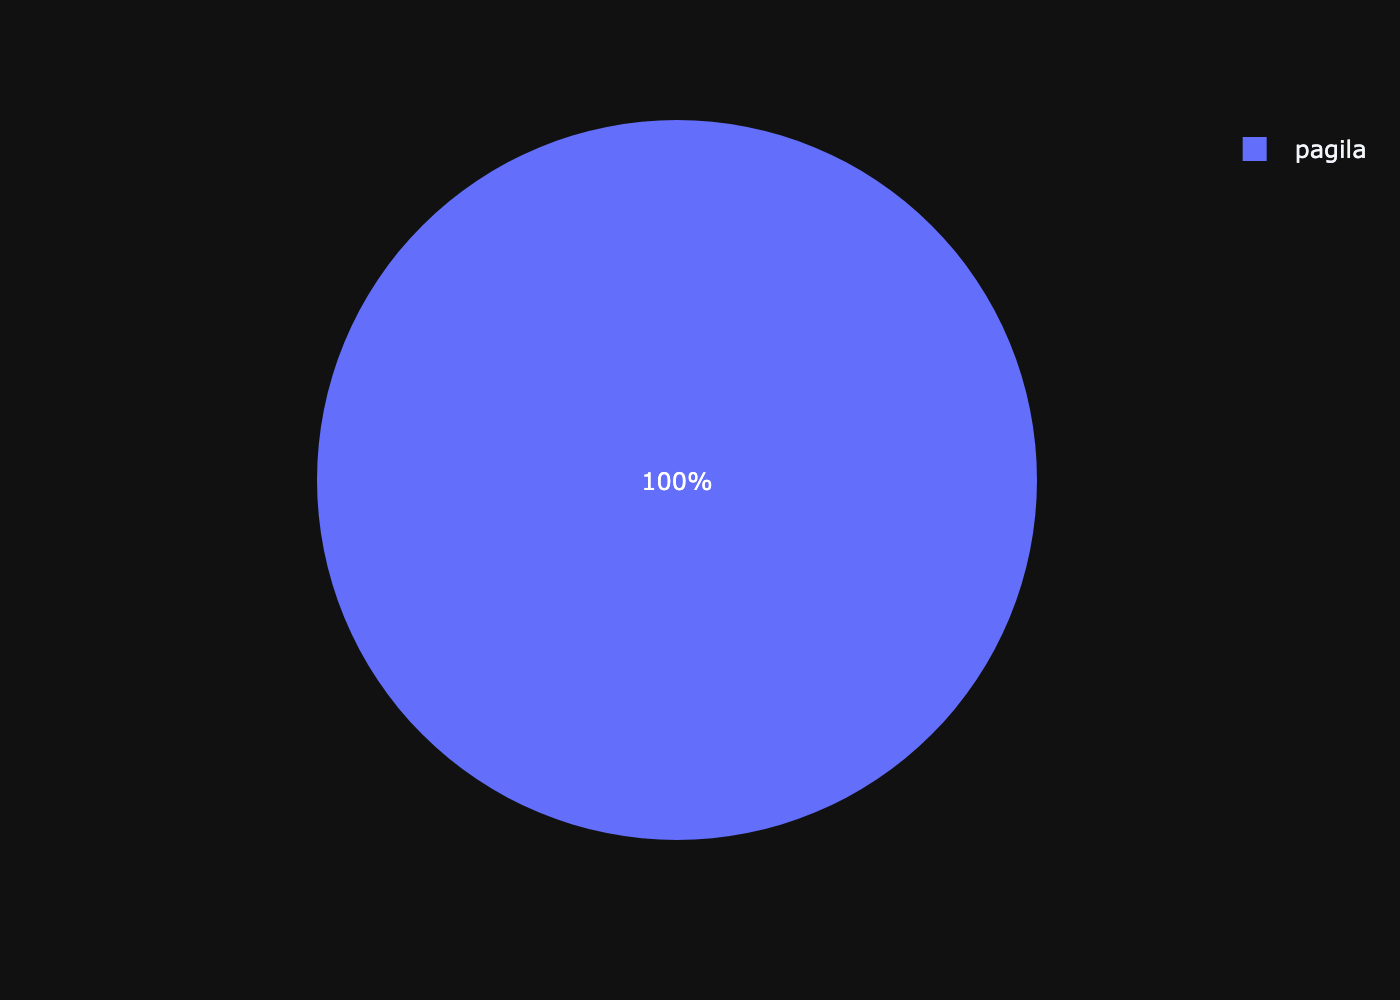

('SELECT current_database();',
   current_database
 0           pagila,
 Figure({
     'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
               'hovertemplate': 'current_database=%{label}<extra></extra>',
               'labels': array(['pagila'], dtype=object),
               'legendgroup': '',
               'name': '',
               'showlegend': True,
               'type': 'pie'}],
     'layout': {'legend': {'tracegroupgap': 0}, 'margin': {'t': 60}, 'template': '...'}
 }))

In [ ]:
vn.ask("What is the database name?	")

In [ ]:
from vanna.flask import VannaFlaskApp
VannaFlaskApp(vn).run()


Your app is running at:
http://localhost:8084
 * Serving Flask app 'vanna.flask'
 * Debug mode: on
Adding ddl: CREATE TABLE IF NOT EXISTS public.address
(
    address_id integer NOT NULL DEFAULT nextval('address_address_id_seq'::regclass),
    address text COLLATE pg_catalog."default" NOT NULL,
    address2 text COLLATE pg_catalog."default",
    district text COLLATE pg_catalog."default" NOT NULL,
    city_id smallint NOT NULL,
    postal_code text COLLATE pg_catalog."default",
    phone text COLLATE pg_catalog."default" NOT NULL,
    last_update timestamp with time zone NOT NULL DEFAULT now(),
    CONSTRAINT address_pkey PRIMARY KEY (address_id),
    CONSTRAINT address_city_id_fkey FOREIGN KEY (city_id)
        REFERENCES public.city (city_id) MATCH SIMPLE
        ON UPDATE CASCADE
        ON DELETE RESTRICT
)
Adding documentation....
None
None
